### https://blog.csdn.net/Cyrus_May/article/details/113504879

> ## **准备工作**

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
# train.drop("Id", axis = 1, inplace = True)

> ## **数据画像**

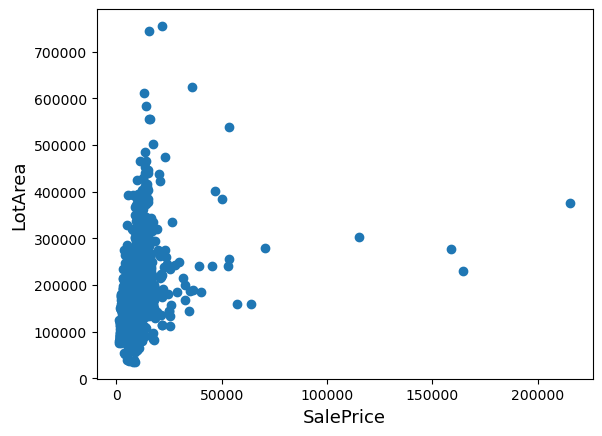

In [32]:
fig, ax = plt.subplots()
ax.scatter(x = train['LotArea'], y = train['SalePrice'])
plt.xlabel('SalePrice', fontsize = 13)
plt.ylabel('LotArea', fontsize = 13)
plt.show()

In [33]:
x = train['LotArea']
y = train['SalePrice']
n = len(x)
data = np.ones([n, 2])
for i in range(n):
    data[i][0] = x[i]
    data[i][1] = y[i]
    
# print(data[0])

> ## **采用sklearn内置DBSCAN**

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

> ## **选择参数**
> 其中tar为拐点，选择50为试出来的

14340.58924870244


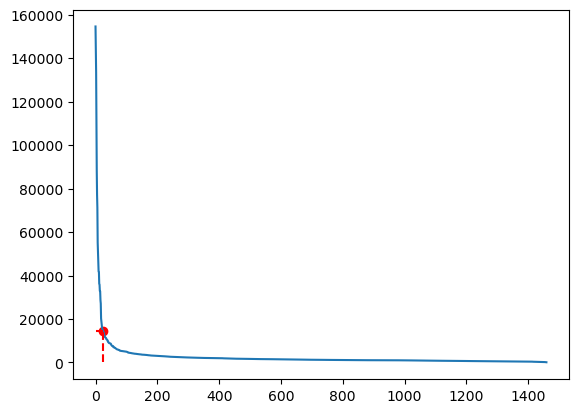

In [35]:
def select_MinPts(data, k):
    k_dist = []
    for i in range(data.shape[0]):
        dist = (((data[i] - data)**2).sum(axis=1)**0.5)
        dist.sort()
        k_dist.append(dist[k])
    return np.array(k_dist)
k = 3 # 2 * 2 - 1
k_dist = select_MinPts(data, k)
k_dist.sort()
plt.plot(np.arange(k_dist.shape[0]), k_dist[::-1])
# plt.show()

tar = 25
eps = k_dist[::-1][tar]
print(eps)
plt.scatter(tar, eps, color='r')
plt.plot([0, tar], [eps, eps], linestyle="--", color = 'r')
plt.plot([tar, tar], [0, eps], linestyle="--", color = 'r')
plt.show()

>## **建立聚类模型**

In [36]:
dbscan_model = DBSCAN(eps = eps, min_samples = k + 1)
label = dbscan_model.fit_predict(data)
# print(label)

> ## **可视化展示**

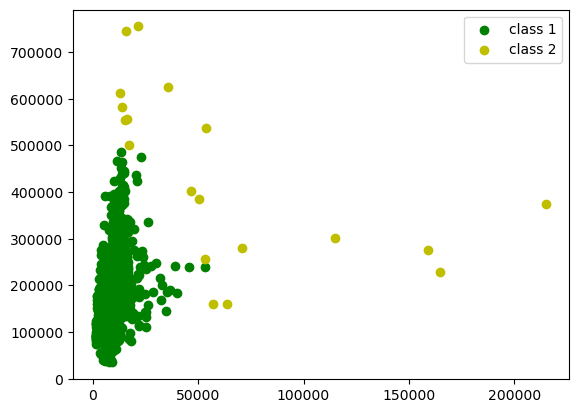

In [37]:
class_1 = []
class_2 = []
for index,value in enumerate(label):
    if value == 0:
        class_1.append(index)
    elif value == -1:
        class_2.append(index)
plt.scatter(data[class_1,0],data[class_1,1],color="g",label="class 1")
plt.scatter(data[class_3,0],data[class_3,1],color="y",label = "class 2")
plt.legend()
plt.show()
